<a href="https://colab.research.google.com/github/R0hithReddyG/Encryption-of-Files/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network (RNN) Implementations in TensorFlow/Keras

This notebook demonstrates three different applications of RNNs:

1. **Sentiment Analysis** using IMDB dataset  
2. **Sequential RNN for Next Word Prediction**  
3. **Improved Bidirectional RNN for Word Matching**

Each section includes preprocessing, model building, training, evaluation, and visualization.


## 1. RNN for Sentiment Analysis
We will use the **IMDB movie reviews dataset** to build a sentiment classifier (positive/negative).


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("1. RNN FOR SENTIMENT ANALYSIS")
print("=" * 60)

# Load IMDB dataset
vocab_size = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Sequence length: {max_length}")


1. RNN FOR SENTIMENT ANALYSIS
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Sequence length: 200


In [2]:
# Build RNN model for sentiment analysis
model_sentiment = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_sentiment.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_sentiment.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
history_sentiment = model_sentiment.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate
test_loss, test_acc = model_sentiment.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.5094 - loss: 0.7078 - val_accuracy: 0.5696 - val_loss: 0.6807
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.5539 - loss: 0.6855 - val_accuracy: 0.5812 - val_loss: 0.6703
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.5857 - loss: 0.6690 - val_accuracy: 0.5926 - val_loss: 0.6582
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.6112 - loss: 0.6493 - val_accuracy: 0.6054 - val_loss: 0.6471
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.6448 - loss: 0.6242 - val_accuracy: 0.6204 - val_loss: 0.6327
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6784 - loss: 0.5892 - val_accuracy: 0.6292 - val_loss: 0.6220
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.7179 - loss: 0.5512 - val_accuracy: 0.6576 - val_loss: 0.6038
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7580 - loss: 0.4981

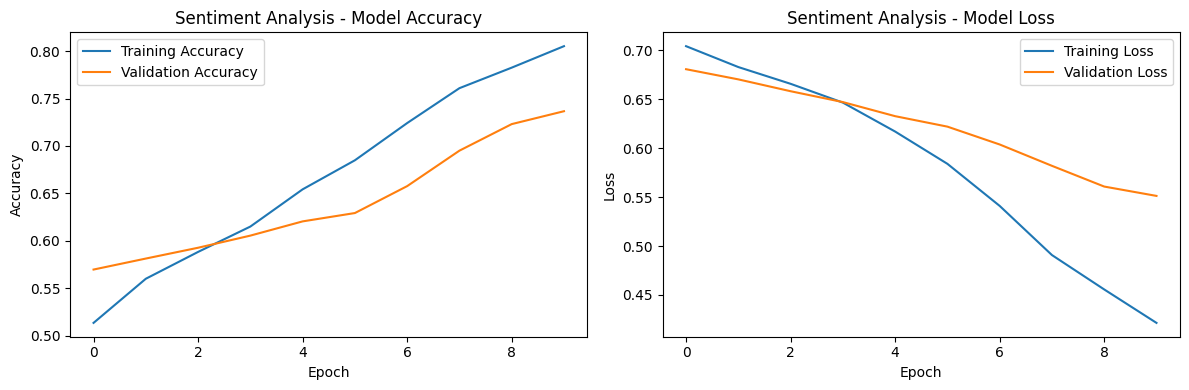

In [4]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_sentiment.history['accuracy'], label='Training Accuracy')
plt.plot(history_sentiment.history['val_accuracy'], label='Validation Accuracy')
plt.title('Sentiment Analysis - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sentiment.history['loss'], label='Training Loss')
plt.plot(history_sentiment.history['val_loss'], label='Validation Loss')
plt.title('Sentiment Analysis - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


### Sample Predictions
We will decode some test reviews and compare the predicted vs actual sentiment.


In [5]:
# Decode words
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Sample predictions
sample_indices = [0, 100, 200]
for idx in sample_indices:
    review = decode_review(X_test[idx])
    prediction = model_sentiment.predict(X_test[idx:idx+1])[0][0]
    actual = y_test[idx]
    sentiment_pred = "Positive" if prediction > 0.5 else "Negative"
    sentiment_actual = "Positive" if actual == 1 else "Negative"

    print(f"\nSample {idx}:")
    print(f"Review: {review[:100]}...")
    print(f"Predicted: {sentiment_pred} ({prediction:.4f})")
    print(f"Actual: {sentiment_actual}")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

Sample 0:
Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...
Predicted: Positive (0.5788)
Actual: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Sample 100:
Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...
Predicted: Negative (0.0812)
Actual: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Sample 200:
Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...
Predicted: Negative (0.4468)
Actual: Positive


## 2. Sequential RNN for Next Word Prediction
We will build a language model on small sample text and predict the next word(s).


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

sample_text = """
The quick brown fox jumps over the lazy dog. The dog was sleeping peacefully under the tree.
Machine learning is a subset of artificial intelligence. Deep learning uses neural networks.
Natural language processing helps computers understand human language. Text analysis is important.
Python is a programming language. TensorFlow is a machine learning framework.
Data science combines statistics and programming. Algorithms solve complex problems.
"""

# Preprocess text
sentences = sample_text.strip().split('.')
sentences = [s.strip().lower() for s in sentences if len(s.strip()) > 10]

print(f"Number of sentences: {len(sentences)}")
for i, sent in enumerate(sentences[:3]):
    print(f"{i+1}: {sent}")


Number of sentences: 10
1: the quick brown fox jumps over the lazy dog
2: the dog was sleeping peacefully under the tree
3: machine learning is a subset of artificial intelligence


In [7]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(f"Total unique words: {total_words}")

# Create input sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences = []
for sentence in sentences:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X_seq = input_sequences[:, :-1]
y_seq = input_sequences[:, -1]
y_seq = tf.keras.utils.to_categorical(y_seq, num_classes=total_words)


Total unique words: 49


In [8]:
# Build Sequential RNN model
model_seq = Sequential([
    Embedding(total_words, 50, input_length=max_sequence_length-1),
    SimpleRNN(100, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(100),
    Dense(total_words, activation='softmax')
])

model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_seq.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history_seq = model_seq.fit(
    X_seq, y_seq,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step - accuracy: 0.0263 - loss: 3.9160 - val_accuracy: 0.0000e+00 - val_loss: 3.9181
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.1687 - loss: 3.7746 - val_accuracy: 0.0000e+00 - val_loss: 3.9742
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1791 - loss: 3.6782 - val_accuracy: 0.0000e+00 - val_loss: 4.0359
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2738 - loss: 3.5709 - val_accuracy: 0.0000e+00 - val_loss: 4.1024
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3527 - loss: 3.4573 - val_accuracy: 0.0000e+00 - val_loss: 4.2223
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2054 - loss: 3.3885 - val_accuracy: 0.0000e+00 - val_loss: 4.3563
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2946 - loss: 3.2778 - val_accuracy: 0.0000e+00 - val_loss: 4.4619
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2842 - loss: 3.1778 - val_accura

In [10]:
# Function to predict next words
def predict_next_words(model, tokenizer, text, num_words=5):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]

        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                text += " " + word
                break
    return text

# Test predictions
test_phrases = ["the quick brown", "machine learning is", "python is a", "data science"]
for phrase in test_phrases:
    print(f"Input: '{phrase}' -> Prediction: '{predict_next_words(model_seq, tokenizer, phrase, 3)}'")


Input: 'the quick brown' -> Prediction: 'the quick brown fox jumps over'
Input: 'machine learning is' -> Prediction: 'machine learning is a subset of'
Input: 'python is a' -> Prediction: 'python is a programming language artificial'
Input: 'data science' -> Prediction: 'data science is a subset'


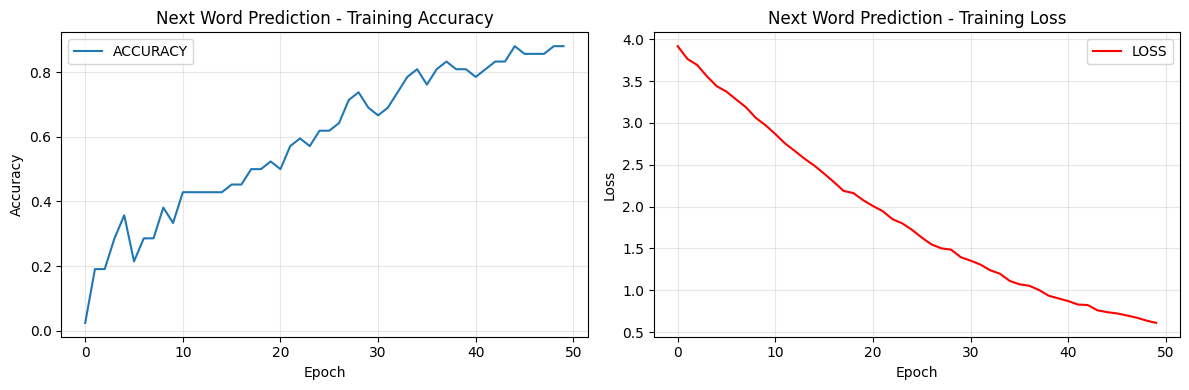

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_seq.history['accuracy'], label='ACCURACY')
plt.title('Next Word Prediction - Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_seq.history['loss'], label='LOSS', color='red')
plt.title('Next Word Prediction - Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Improved Bidirectional RNN for Word Matching
We will generate synthetic word pairs and build a **Bidirectional LSTM model** to classify whether two words belong to the same category.


In [12]:
from tensorflow.keras.layers import Bidirectional, LSTM, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [13]:
# Create improved synthetic dataset
import numpy as np

def create_improved_word_matching_dataset(num_samples=8000):
    vocabulary = [
        'apple','banana','orange','grape','strawberry','mango','pineapple',
        'car','truck','bicycle','motorcycle','bus','train','airplane',
        'dog','cat','bird','fish','rabbit','horse','elephant',
        'red','blue','green','yellow','purple','orange','pink',
        'big','small','tall','short','wide','narrow','thick',
        'run','walk','jump','swim','fly','climb','crawl',
        'happy','sad','angry','excited','calm','nervous','proud',
        'house','school','park','store','library','hospital','restaurant'
    ]

    similar_groups = [
        ['apple','banana','orange','grape','strawberry','mango','pineapple'],
        ['car','truck','bicycle','motorcycle','bus','train','airplane'],
        ['dog','cat','bird','fish','rabbit','horse','elephant'],
        ['red','blue','green','yellow','purple','orange','pink'],
        ['big','small','tall','short','wide','narrow','thick'],
        ['run','walk','jump','swim','fly','climb','crawl'],
        ['happy','sad','angry','excited','calm','nervous','proud'],
        ['house','school','park','store','library','hospital','restaurant']
    ]

    word_pairs, labels = [], []

    # Positive samples (same category)
    for _ in range(int(num_samples * 0.6)):
        group = np.random.choice(len(similar_groups))
        w1, w2 = np.random.choice(similar_groups[group], 2, replace=False)
        word_pairs.append((w1, w2))
        labels.append(1)

    # Negative samples (different categories)
    for _ in range(int(num_samples * 0.4)):
        g1, g2 = np.random.choice(len(similar_groups), 2, replace=False)
        w1 = np.random.choice(similar_groups[g1])
        w2 = np.random.choice(similar_groups[g2])
        word_pairs.append((w1, w2))
        labels.append(0)

    return word_pairs, labels, vocabulary

word_pairs, labels, vocab = create_improved_word_matching_dataset(8000)

print(f"Generated {len(word_pairs)} pairs")
print(f"Positive samples: {sum(labels)}")
print(f"Negative samples: {len(labels)-sum(labels)}")
print("\nSample pairs:", word_pairs[:5])


Generated 8000 pairs
Positive samples: 4800
Negative samples: 3200

Sample pairs: [(np.str_('big'), np.str_('tall')), (np.str_('purple'), np.str_('orange')), (np.str_('thick'), np.str_('tall')), (np.str_('angry'), np.str_('happy')), (np.str_('small'), np.str_('thick'))]


### Data Preparation
We map each word to an index and pad sequences for model input.


In [14]:
def prepare_improved_matching_data(word_pairs, labels, vocab):
    word_to_idx = {w: i+1 for i, w in enumerate(vocab)}
    word_to_idx['<PAD>'] = 0
    word_to_idx['<UNK>'] = len(vocab)+1

    max_len = 12
    X1, X2 = [], []

    for w1, w2 in word_pairs:
        seq1 = [word_to_idx.get(w1, word_to_idx['<UNK>'])] + [0]*(max_len-1)
        seq2 = [word_to_idx.get(w2, word_to_idx['<UNK>'])] + [0]*(max_len-1)
        X1.append(seq1[:max_len])
        X2.append(seq2[:max_len])

    return np.array(X1), np.array(X2), np.array(labels), len(word_to_idx)

X1, X2, y_match, vocab_size = prepare_improved_matching_data(word_pairs, labels, vocab)
print("X1 shape:", X1.shape, "y shape:", y_match.shape)


X1 shape: (8000, 12) y shape: (8000,)


### Train-Test Split


In [15]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, y_match, test_size=0.2, stratify=y_match, random_state=42
)


### Model Architecture
We use **Bidirectional LSTMs** with:
- Feature concatenation  
- Element-wise difference & product  
- Dense layers with BatchNorm & Dropout  


In [16]:
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, concatenate, subtract, multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional, LSTM, BatchNormalization

def create_improved_word_encoder():
    inp = Input(shape=(12,))
    emb = Embedding(vocab_size, 64, mask_zero=True)(inp)
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(emb)
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(x)
    x = BatchNormalization()(x)
    return Model(inp, x)

word_encoder = create_improved_word_encoder()

inp1, inp2 = Input(shape=(12,)), Input(shape=(12,))
enc1, enc2 = word_encoder(inp1), word_encoder(inp2)

combined = concatenate([enc1, enc2])
diff = subtract([enc1, enc2])
prod = multiply([enc1, enc2])
features = concatenate([combined, diff, prod])

x = Dense(128, activation='relu')(features)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

out = Dense(1, activation='sigmoid')(x)

model_matching = Model([inp1, inp2], out)
model_matching.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy','Precision','Recall'])

model_matching.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_2        │ (None, 64)        │    111,680 │ input_layer_3[0]… │
│ (Functional)        │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ functional_2[0][… │
│ (Concatenate)       │                   │            │ functional_2[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 64)        │          0 │ functional_2[0][… │
│                     │                   │            │ functional_2[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 64)        │          0 │ functional_2[0][… │
│                     │                   │            │ functional_2[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256)       │          0 │ concatenate[0][0… │
│ (Concatenate)       │                   │            │ subtract[0][0],   │
│                     │                   │            │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 155,713 (608.25 KB)

 Trainable params: 154,945 (605.25 KB)

 Non-trainable params: 768 (3.00 KB)

### Training with Early Stopping + LR Scheduler


In [17]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=1e-5)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_matching = model_matching.fit(
    [X1_train, X2_train], y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - Precision: 0.6200 - Recall: 0.2679 - accuracy: 0.4582 - loss: 0.9633 - val_Precision: 0.5898 - val_Recall: 1.0000 - val_accuracy: 0.5898 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - Precision: 0.6427 - Recall: 0.6806 - accuracy: 0.5859 - loss: 0.6914 - val_Precision: 0.5898 - val_Recall: 1.0000 - val_accuracy: 0.5898 - val_loss: 0.6738 - learning_rate: 0.0010
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - Precision: 0.7519 - Recall: 0.8417 - accuracy: 0.7344 - loss: 0.5250 - val_Precision: 0.6634 - val_Recall: 1.0000 - val_accuracy: 0.7008 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - Precision: 0.8440 - Recall: 0.9376 - accuracy: 0.8579 - loss: 0.3562 - val_Precision: 0.8718 - val_Recall: 1.0000 - val_accuracy: 0.9133 - val_loss: 0.2304 - learning_rate: 0.0010
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - Preci

### Evaluation
We check Accuracy, Precision, Recall, F1, and Confusion Matrix.


Accuracy: 0.9969, Precision: 0.9948, Recall: 1.0000, F1: 0.9974
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step

Classification Report:
               precision    recall  f1-score   support

    No Match       1.00      0.99      1.00       640
       Match       0.99      1.00      1.00       960

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



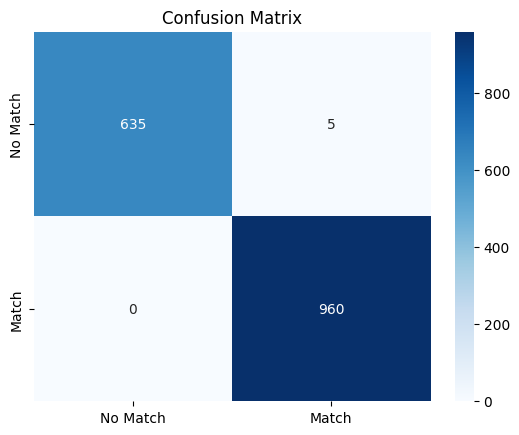

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, acc, prec, rec = model_matching.evaluate([X1_test, X2_test], y_test, verbose=0)
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {2*(prec*rec)/(prec+rec):.4f}")

y_pred_prob = model_matching.predict([X1_test, X2_test])
y_pred = (y_pred_prob>0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No Match','Match']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Match','Match'], yticklabels=['No Match','Match'])
plt.title("Confusion Matrix")
plt.show()


### Training History Visualization


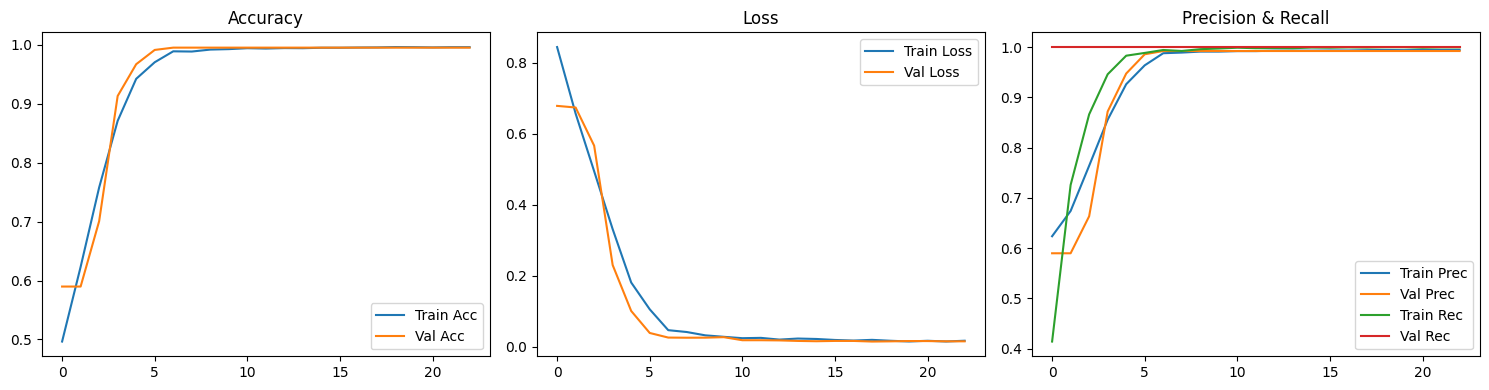

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(history_matching.history['accuracy'], label='Train Acc')
plt.plot(history_matching.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,3,2)
plt.plot(history_matching.history['loss'], label='Train Loss')
plt.plot(history_matching.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.subplot(1,3,3)
plt.plot(history_matching.history['Precision'], label='Train Prec')
plt.plot(history_matching.history['val_Precision'], label='Val Prec')
plt.plot(history_matching.history['Recall'], label='Train Rec')
plt.plot(history_matching.history['val_Recall'], label='Val Rec')
plt.legend(); plt.title("Precision & Recall")

plt.tight_layout()
plt.show()

### Testing with Custom Word Pairs


In [21]:
def test_improved_word_matching(word1, word2, vocab):
    word_to_idx = {w: i+1 for i, w in enumerate(vocab)}
    word_to_idx['<PAD>'] = 0
    word_to_idx['<UNK>'] = len(vocab)+1

    max_len=12
    seq1=[word_to_idx.get(word1,word_to_idx['<UNK>'])]+[0]*(max_len-1)
    seq2=[word_to_idx.get(word2,word_to_idx['<UNK>'])]+[0]*(max_len-1)

    pred = model_matching.predict([np.array([seq1]),np.array([seq2])], verbose=0)[0][0]
    status="Match" if pred>0.5 else "No Match"
    return status, pred

pairs=[('apple','banana'),('car','truck'),('apple','car'),('dog','cat')]
for w1,w2 in pairs:
    status,p=test_improved_word_matching(w1,w2,vocab)
    print(f"{w1} vs {w2}: {status} ({p:.4f})")


apple vs banana: Match (0.9999)
car vs truck: Match (1.0000)
apple vs car: No Match (0.0000)
dog vs cat: Match (1.0000)
